In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/meteo_2021.csv')
df.head()

,nb,date,temp,wind,rain,Dayweek,Month
0,8255,2021-04-09,10.68,4.25,0.11,Friday,4
1,16889,2021-04-10,10.12,3.52,0.00,Saturday,4
2,13475,2021-04-11,9.83,4.33,0.92,Sunday,4
3,9508,2021-04-12,7.28,4.47,0.27,Monday,4
4,13433,2021-04-13,6.45,2.21,0.01,Tuesday,4


In [18]:
X = df.iloc[:, [2, 3, 4, 6]].values
y = df.iloc[:, 0].values
X,Xtest,y,ytest = train_test_split(X,y,train_size=.8, random_state=2)

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
def choix_profondeur(X,y):
    l = list()
    for n in range(8):
        ab = DecisionTreeRegressor(max_depth=1+n)
        ab.fit(X,y)
        l.append(ab.score(X,y))
    return l
            

In [19]:
choix_profondeur(X,y)

[0.520261226436746,
 0.6298736162116427,
 0.7039029120079903,
 0.768394640729924,
 0.8530010577844289,
 0.9024121418731661,
 0.9305249657194608,
 0.9700441872009024]

In [7]:
ab1 = DecisionTreeRegressor(max_depth=3)
ab1.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [8]:
ab1.score(X,y)

0.7505658103741548

In [9]:
variables = ["temp","wind","rain","month"]

In [10]:
from sklearn import tree

In [11]:
text_representation = tree.export_text(ab1,feature_names=variables)
print(text_representation)

|--- temp <= 11.55
|   |--- month <= 4.50
|   |   |--- temp <= 5.91
|   |   |   |--- value: [5780.33]
|   |   |--- temp >  5.91
|   |   |   |--- value: [11899.92]
|   |--- month >  4.50
|   |   |--- rain <= 0.00
|   |   |   |--- value: [20953.33]
|   |   |--- rain >  0.00
|   |   |   |--- value: [17349.32]
|--- temp >  11.55
|   |--- month <= 5.50
|   |   |--- wind <= 3.70
|   |   |   |--- value: [23665.22]
|   |   |--- wind >  3.70
|   |   |   |--- value: [21238.20]
|   |--- month >  5.50
|   |   |--- rain <= 0.15
|   |   |   |--- value: [30591.40]
|   |   |--- rain >  0.15
|   |   |   |--- value: [26106.88]



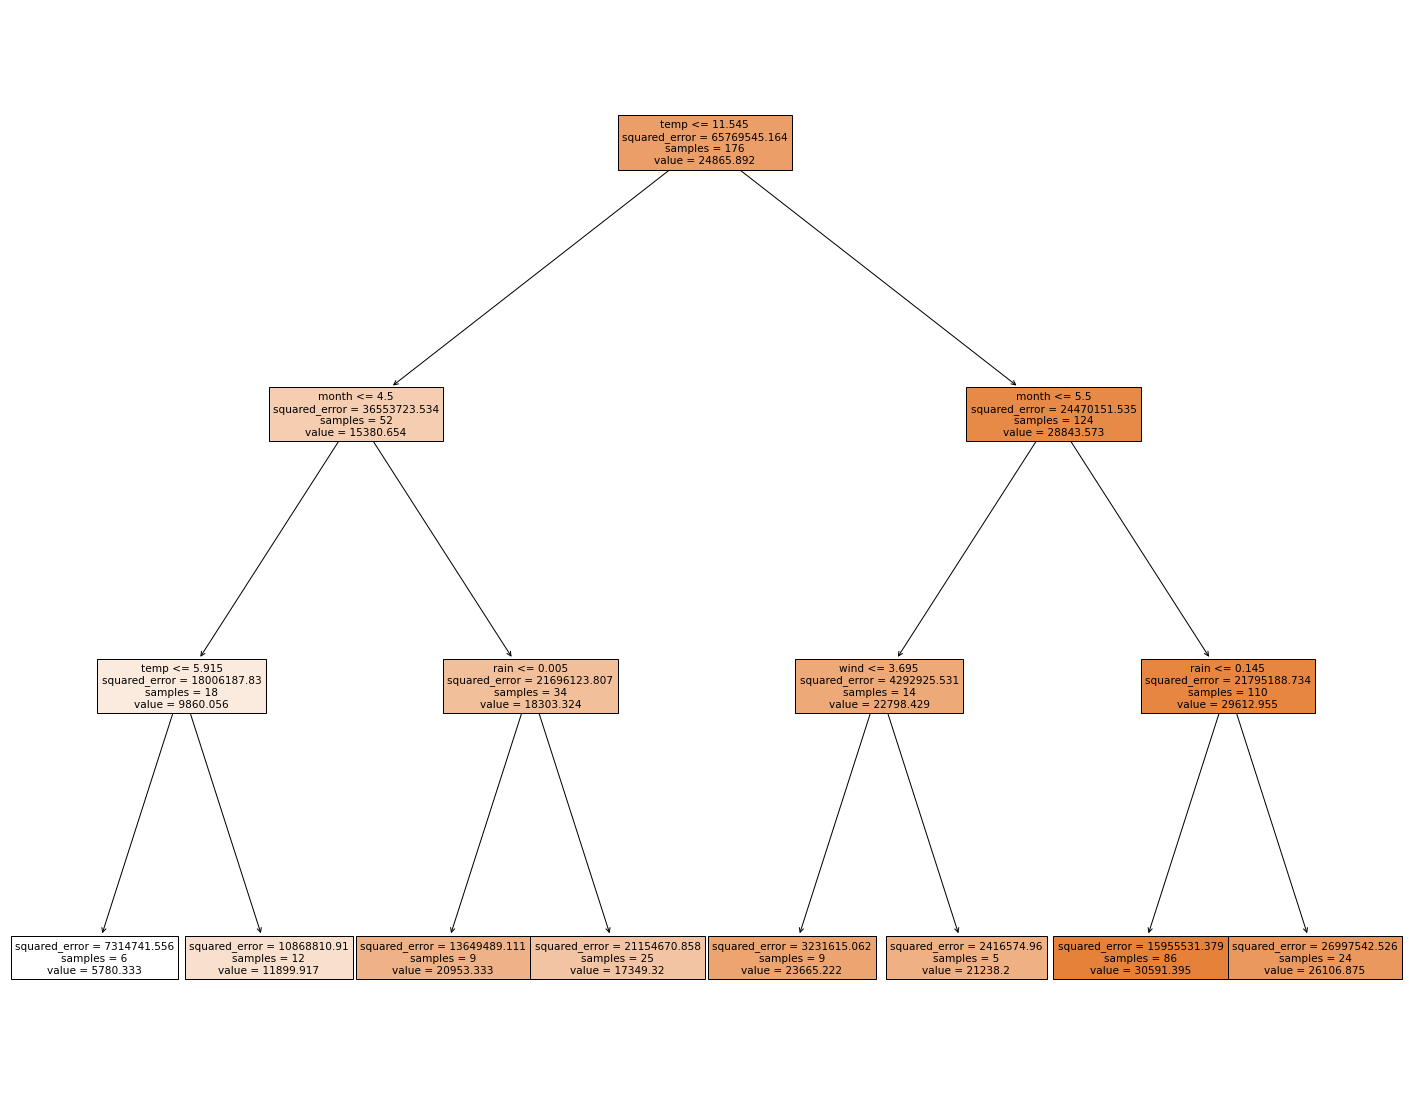

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ab1, feature_names=variables,filled=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


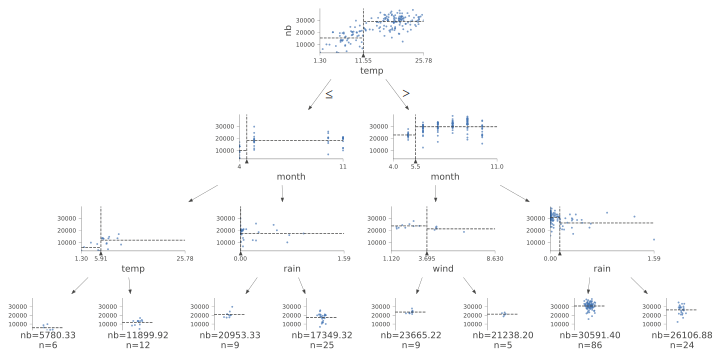

In [13]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(ab1, X, y,
                target_name="nb",
                feature_names=variables)
viz

In [14]:
ab1.score(Xtest,ytest)

0.402517466651507

Bien meilleure qu'une régression linéaire

In [15]:
def comparaisonArbre(X,y,Xtest,ytest):
    ent = list()
    test = list()
    for n in range(8):
        ab = DecisionTreeRegressor(max_depth=1+n)
        ab.fit(X,y)
        ent.append(ab.score(X,y))
        test.append(ab.score(Xtest,ytest))
    return ent, test

In [20]:
ent, test = comparaisonArbre(X,y,Xtest,ytest)
ent, test

([0.520261226436746,
  0.6298736162116427,
  0.7039029120079903,
  0.768394640729924,
  0.8530010577844289,
  0.9024121418731661,
  0.9305249657194608,
  0.9700441872009024],
 [0.5670168282926505,
  0.6804505704185106,
  0.7223964511558176,
  0.7278137844075929,
  0.6343690789546897,
  0.68332783511118,
  0.5591149788587472,
  0.5599628189585981])

([<matplotlib.lines.Line2D at 0x7f3c2b2cd0>],
 [<matplotlib.lines.Line2D at 0x7f3c2b2fd0>])

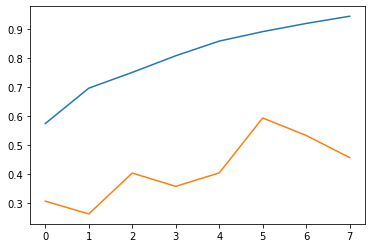

In [17]:
plt.plot(ent), plt.plot(test)